In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [108]:
filepath = "./cancer/cancerData-complete.csv"

In [109]:
df = pd.read_csv(filepath, encoding = 'ISO-8859-1')

In [110]:
df.sample(10)

,gender,breastCancer,age,ever_married,work_type,residence_type,pollution (ppm),humidity,smoking_status,location,temprature,longitude,latitude
15225,Female,0,23,No,Private,Urban,89.26,38.8,never smoked,Amroha,24.807978,28.13,79.09
22368,Female,0,59,Yes,Govt_job,Rural,70.10,37.2,never smoked,Ambala,23.159538,29.74,77.54
25563,Female,0,29,No,Govt_job,Urban,65.02,20.6,never smoked,Alappuzha,26.298882,8.84,77.03
6400,Female,0,70,Yes,Self-employed,Rural,88.73,35.1,never smoked,Bhadravati,25.324728,13.66,75.14
3454,Female,0,21,No,Private,Rural,82.48,26.0,never smoked,Bhilai,26.000307,21.70,82.21
23774,Female,1,44,Yes,Private,Urban,217.86,39.7,never smoked,Agartala,24.913291,23.31,91.75
5398,Female,1,65,Yes,Private,Rural,97.36,37.2,formerly smoked,Agra,25.207319,26.52,78.81
23927,Female,0,64,Yes,Private,Urban,81.67,35.9,formerly smoked,Akola,26.566451,20.09,76.78
6281,Female,1,40,Yes,Private,Urban,79.04,33.0,smokes,Bally,26.042152,23.31,88.25
14623,Female,0,56,Yes,Self-employed,Rural,77.32,22.2,never smoked,Bally,26.042152,23.31,88.25


In [111]:
df.shape

(29065, 13)

In [112]:
df.describe()

,breastCancer,age,pollution (ppm),humidity,temprature,longitude,latitude
count,29065.000000,29065.000000,29065.000000,29065.000000,29065.000000,29065.000000,29065.000000
mean,0.177051,47.676174,106.405639,30.054684,25.743985,22.546995,80.258400
std,0.381719,18.732941,45.272453,7.193951,1.048304,4.742676,5.703334
min,0.000000,10.000000,55.010000,10.100000,22.831123,8.840000,69.030000
25%,0.000000,32.000000,77.630000,25.000000,25.152420,20.090000,75.390000
50%,0.000000,48.000000,92.130000,28.900000,25.829766,23.310000,78.810000
75%,0.000000,62.000000,113.910000,33.900000,26.281198,26.520000,86.500000
max,1.000000,82.000000,291.050000,92.000000,28.417858,31.350000,93.500000


In [113]:
df.columns

Index(['gender', 'breastCancer', 'age', 'ever_married', 'work_type',
       'residence_type', 'pollution (ppm)', 'humidity', 'smoking_status',
       'location', 'temprature', 'longitude', 'latitude'],
      dtype='object')

In [114]:
#df.apply(lambda x: func(x['col1'],x['col2']),axis=1)
df["ever_married_en"]=df["ever_married"].apply(lambda x: 1 if x == 'Yes' else 0)
df["residence_en"]=df["residence_type"].apply(lambda x: 1 if x == 'Urban' else 0)

In [115]:
smoke_status = (df.groupby('smoking_status').size()) / len(df)
df['smoke_status_encode'] = df['smoking_status'].apply(lambda x : smoke_status[x])

In [116]:
cols_to_be_Removed = ['gender','ever_married','work_type','smoking_status','residence_type','location','longitude','latitude']
df=df.drop(cols_to_be_Removed,axis=1)

In [117]:
corr= df.corr()
corr.style.background_gradient(cmap='coolwarm')

,breastCancer,age,pollution (ppm),humidity,temprature,ever_married_en,residence_en,smoke_status_encode
breastCancer,1.000000,0.211980,0.490098,0.217722,0.000833,0.119353,0.115097,-0.307802
age,0.211980,1.000000,0.228283,0.106226,0.002816,0.547131,0.003480,-0.135340
pollution (ppm),0.490098,0.228283,1.000000,0.176936,-0.004399,0.117362,-0.002574,-0.086646
humidity,0.217722,0.106226,0.176936,1.000000,0.005937,0.143129,-0.002898,-0.092753
temprature,0.000833,0.002816,-0.004399,0.005937,1.000000,-0.001503,0.005362,-0.001601
ever_married_en,0.119353,0.547131,0.117362,0.143129,-0.001503,1.000000,0.004918,-0.097128
residence_en,0.115097,0.003480,-0.002574,-0.002898,0.005362,0.004918,1.000000,-0.055060
smoke_status_encode,-0.307802,-0.135340,-0.086646,-0.092753,-0.001601,-0.097128,-0.055060,1.000000


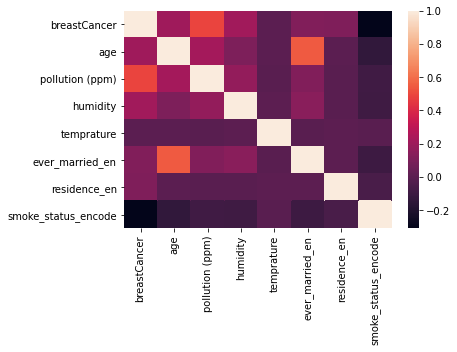

In [118]:
sns.heatmap(df.corr())

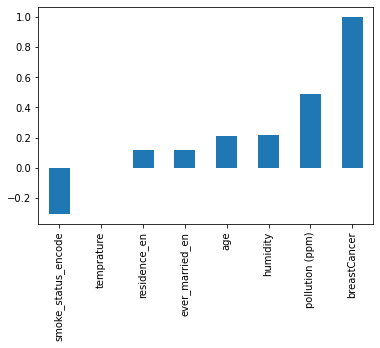

In [119]:
df.corr()['breastCancer'].sort_values().plot(kind='bar')

In [120]:
X= df.drop('breastCancer',axis=1).values
y=df['breastCancer'].values

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [122]:
from sklearn.preprocessing import MinMaxScaler

In [123]:
scaler = MinMaxScaler()

In [124]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [125]:
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [126]:
X_train.shape

(19473, 7)

In [127]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [128]:
model = Sequential()

model.add(Dense(units=7,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=7,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1,activation='sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam')

In [129]:
early_stop = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=10)

In [130]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
609/609 [==============================] - 1s 2ms/step - loss: 0.5182 - val_loss: 0.4329
Epoch 2/600
609/609 [==============================] - 1s 1ms/step - loss: 0.4519 - val_loss: 0.4089
Epoch 3/600
609/609 [==============================] - 1s 1ms/step - loss: 0.4270 - val_loss: 0.3825
Epoch 4/600
609/609 [==============================] - 1s 1ms/step - loss: 0.4070 - val_loss: 0.3579
Epoch 5/600
609/609 [==============================] - 1s 1ms/step - loss: 0.3919 - val_loss: 0.3410
Epoch 6/600
609/609 [==============================] - 1s 1ms/step - loss: 0.3759 - val_loss: 0.3231
Epoch 7/600
609/609 [==============================] - 1s 1ms/step - loss: 0.3658 - val_loss: 0.3188
Epoch 8/600
609/609 [==============================] - 1s 1ms/step - loss: 0.3578 - val_loss: 0.3147
Epoch 9/600
609/609 [==============================] - 1s 1ms/step - loss: 0.3583 - val_loss: 0.3118
Epoch 10/600
609/609 [==============================] - 1s 1ms/step - loss: 0.3545 - val_lo

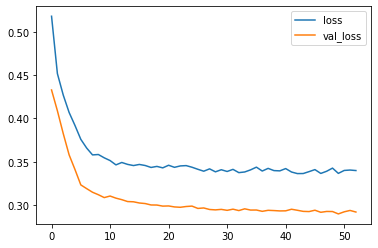

In [131]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [132]:
from sklearn.metrics import classification_report,confusion_matrix


predictions = model.predict_classes(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.98      0.91      7859
           1       0.73      0.28      0.41      1733

    accuracy                           0.85      9592
   macro avg       0.79      0.63      0.66      9592
weighted avg       0.84      0.85      0.82      9592



In [133]:
print(confusion_matrix(y_test,predictions))

[[7676  183]
 [1246  487]]


In [134]:
model.save('cancer_prediction.h5')

In [135]:
import random
random.seed(342342344)
random_ind = random.randint(0,len(df))

test_user = df.drop('breastCancer',axis=1).iloc[random_ind]
type(test_user)

pandas.core.series.Series

In [137]:
model.predict_classes(scaler.transform(test_user.values.reshape(1,7)))

array([[1]], dtype=int32)

In [138]:
df.iloc[random_ind]['breastCancer']

1.0

In [139]:
df.iloc[random_ind]

breastCancer             1.000000
age                     54.000000
pollution (ppm)        219.670000
humidity                29.400000
temprature              22.831123
ever_married_en          1.000000
residence_en             1.000000
smoke_status_encode      0.224256
Name: 2567, dtype: float64